In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

#storage
import shelve

# pretty printing
from pprint import pformat
from IPython.display import Markdown

# Calcolando $m_{eff}$

Una volta che il file è stato runnato posso aggiungere la stima di $m_{eff}$

In [2]:
file_name = "./simulation_data/square_beta_high.wip"

Controllo prima di tutto che il file sia stato eseguito del tutto:

In [3]:
with shelve.open(file_name, "r") as wip_file:
    simulations_index = wip_file[".index"]
total_sims = len(simulations_index)
# filtering out already done simulations
simulations_index={simulation:simulations_index[simulation] for simulation in simulations_index if simulations_index[simulation]['status'] == "done"}
if total_sims != len(simulations_index):
    print("WARNING: File is not 100% done, some data will be missing")

Calcoliamo ora per ogni distribuzione la deviazione standard in ogni percorso $\langle \sigma^2 \rangle$ e la correlazione $\langle y_n

In [4]:
for simulation in simulations_index:
    # data recovery
    setup = simulations_index[simulation]['setup']
    with shelve.open(file_name) as wip_file:
        data = wip_file[simulation]  # recovering data
    y_s = data['measures']
    # check distribution
    y_mean = np.mean(y_s, axis=1)
    y_sqr_mean = np.mean(y_s**2, axis=1)
    data['sigma_sqr'] = np.mean(y_sqr_mean - y_mean**2)
    # calculating correlations
    y_0 = y_s[:, 0]
    data['correlations'] = ((y_s - y_0[:, np.newaxis])**2).mean()  # mean is both on the path and the ensemble
    # estimating discretization error
    data['f'] = 6 / np.pi**2 * (np.arange(1, setup['N']//2, dtype=float)**(-2)).sum()
    # estimating effective mass
    data['meff'] = setup['eta']*setup['N']*data['f'] / (6 * np.sqrt(setup['d']) * data['correlations'])
    # saving
    with shelve.open(file_name, "w") as wip_file:
        wip_file[simulation] = data  # recovering data

#### --- $d = 0.10$ --- 
acceptance $= 0.80$\
$\left\langle \sigma^2 \right\rangle = 36.06$\
$\left\langle \frac{1}{N} \sum \left(y_n - y_0\right)^2 \right\rangle = 81.75$\
$1-f = 0.00040541985950193205$\
$m_{eff} = 1.93$\


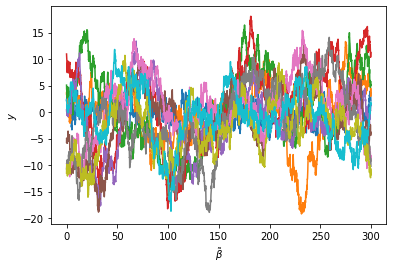

#### --- $d = 2.58$ --- 
acceptance $= 0.59$\
$\left\langle \sigma^2 \right\rangle = 15.35$\
$\left\langle \frac{1}{N} \sum \left(y_n - y_0\right)^2 \right\rangle = 25.17$\
$1-f = 0.00040541985950193205$\
$m_{eff} = 1.24$\


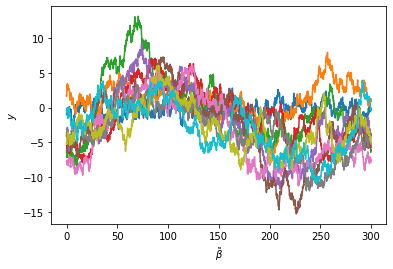

#### --- $d = 5.05$ --- 
acceptance $= 0.53$\
$\left\langle \sigma^2 \right\rangle = 5.60$\
$\left\langle \frac{1}{N} \sum \left(y_n - y_0\right)^2 \right\rangle = 13.12$\
$1-f = 0.00040541985950193205$\
$m_{eff} = 1.70$\


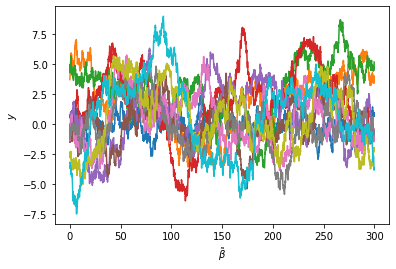

#### --- $d = 7.53$ --- 
acceptance $= 0.49$\
$\left\langle \sigma^2 \right\rangle = 6.64$\
$\left\langle \frac{1}{N} \sum \left(y_n - y_0\right)^2 \right\rangle = 12.35$\
$1-f = 0.00040541985950193205$\
$m_{eff} = 1.48$\


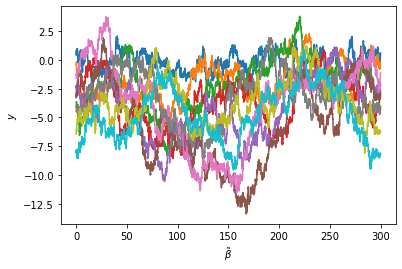

#### --- $d = 10.00$ --- 
acceptance $= 0.46$\
$\left\langle \sigma^2 \right\rangle = 4.98$\
$\left\langle \frac{1}{N} \sum \left(y_n - y_0\right)^2 \right\rangle = 8.55$\
$1-f = 0.00040541985950193205$\
$m_{eff} = 1.85$\


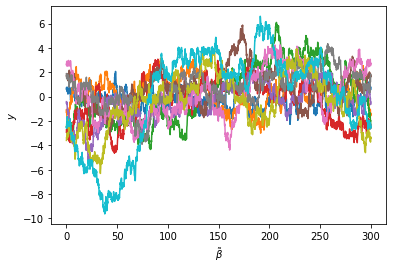

In [5]:
d_s, meff_s = [], []
for simulation in simulations_index:
    # data recovery
    setup = simulations_index[simulation]['setup']
    with shelve.open(file_name) as wip_file:
        data = wip_file[simulation]  # recovering data
    #reporting
    report = f"#### --- $d = {setup['d']:0.2f}$ --- \n"
    report += f"acceptance $= {data['acceptance']:0.2f}$\\\n"
    report += f"$\\left\\langle \\sigma^2 \\right\\rangle = {data['sigma_sqr']:0.2f}$\\\n"
    report += f"$\\left\\langle \\frac{{1}}{{N}} \\sum \\left(y_n - y_0\\right)^2 \\right\\rangle = {data['correlations']:0.2f}$\\\n"
    report += f"$1-f = {1 - data['f']}$\\\n"
    report += f"$m_{{eff}} = {data['meff']:0.2f}$\\\n"
    # calculate
    display(Markdown(report))
    
    plt.figure(setup['d'])
    for i in range(0, setup['measuration_to_take'], setup['measuration_to_take']//10):
        plt.plot(setup['eta']*np.arange(setup["N"]), data["measures"][i])
    plt.ylabel("$y$")
    plt.xlabel("$\\tilde{\\beta}$")
    plt.show()
    
    d_s.append(setup['d'])
    meff_s.append(data['meff'])

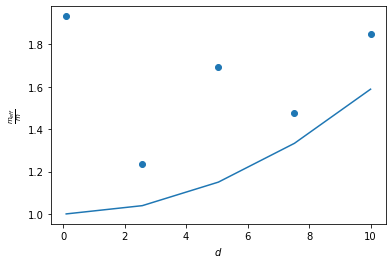

In [8]:
d_s, meff_s = np.array(d_s), np.array(meff_s)
plt.figure("meffs")
plt.scatter(d_s, meff_s)
plt.plot(d_s, 1+0.00589*d_s**2)
plt.ylabel("$\\frac{m_{eff}}{m}$")
plt.xlabel("$d$")
if file_name.endswith(".wip"):
    plt.savefig(file_name[:-4]+".png")
else:
    plt.savefig(file_name+".png")
plt.show()